In [1]:
#Importing required libraries, i.e. OpenCV, Numpy and Tensor Flow
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#importing the dataset form mnist
mnist=tf.keras.datasets.mnist
#splitting the data in training and testing datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#scaling down b/w 0 & 1 the training and test datasets so that the model take much time to train
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#defining the model, which'll have a input layer, two hidden layers and an output layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))               #flatten means it's a simple feet forwaed neural network
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))    #dense means all the neurons are connected to
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))    #previous and the next layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))  #output layer

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
loss, accuracy= model.evaluate(x_test, y_test)



Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1102 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0751 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0583 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0909 - accuracy: 0.9718


In [3]:
print(accuracy)
print(loss)
model.save('digits.model')     #To save the result instead of running it again and again

0.9718000292778015
0.09093450754880905
INFO:tensorflow:Assets written to: digits.model\assets


Probably the result is: 3


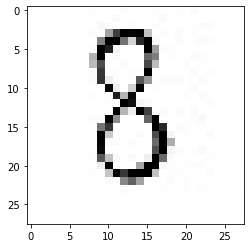

Probably the result is: 7


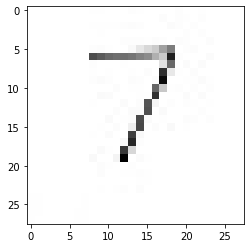

Probably the result is: 1


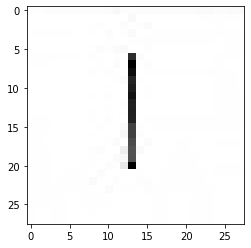

Probably the result is: 3


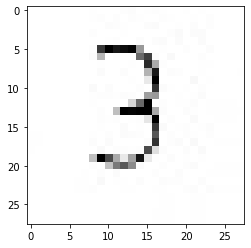

Probably the result is: 0


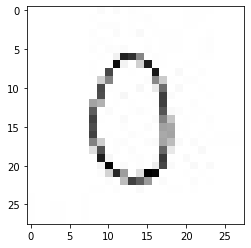

In [8]:
#importing the images 
for x in range(1,6):
    img = cv.imread(f'{x}.jpeg')[:,:,0]    #image read function
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'Probably the result is: {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()